In [1]:
!pip install gdown
!pip install tensorflow_text

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached filelock-3.0.12-py3-none-any.whl (7.6 kB)
     |████████████████████████████████| 68 kB 621 kB/s eta 0:00:01
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9681 sha256=910057b4d985e7b370db58559f157e48dd634a511b2f09ac12db2e3d9a7860e0
  Stored in directory: /Users/tejask/Library/Caches/pip/wheels/ba/e0/7e/726e872a53f7358b4b96a9975b04e98113b005cd8609a63abc
Successfully built gdown
     |████████████████████████████████| 2.2 MB 940 kB/s eta 0:00:01
     |████████████████████████████████| 165.1 MB 8.3 MB/s eta 0:00:013
     |████████████████████████████████| 15.1 MB 26.1 MB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 6.2 MB/s eta 0:00:01
     |████████████████████████████████| 459 kB 10.7 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 2

In [2]:
!pip install wordcloud

     |████████████████████████████████| 161 kB 932 kB/s eta 0:00:01


In [9]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import seaborn as sns
from pylab import rcParams
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
import tensorflow_text
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [10]:
register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [11]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [12]:
!gdown --id 1e1SsVct7B6m3GLKlYKHb4ZGy8Ws4K35r --output 515k-hotel-reviews-data-in-europe.zip

Downloading...
From: https://drive.google.com/uc?id=1e1SsVct7B6m3GLKlYKHb4ZGy8Ws4K35r
To: /Users/tejask/Desktop/vscode/DeepNLP/SentimentAnalysis/515k-hotel-reviews-data-in-europe.zip
47.3MB [00:08, 5.44MB/s]


In [13]:
!unzip -q 515k-hotel-reviews-data-in-europe.zip

In [14]:
!ls

1.SentimentAnalysis.ipynb             Hotel_Reviews.csv
515k-hotel-reviews-data-in-europe.zip


In [15]:
df = pd.read_csv("Hotel_Reviews.csv", parse_dates=['Review_Date'])
df.shape

(515738, 17)

In [17]:
df.head()
df.shape

(515738, 17)

In [18]:
df["review"] = df["Negative_Review"] + df["Positive_Review"]
df["review_type"] = df["Reviewer_Score"].apply(
  lambda x: "bad" if x < 7 else "good"
)

In [19]:
df = df[["review", "review_type"]]

In [20]:
df.head()

,review,review_type
0,I am so angry that i made this post available...,bad
1,No Negative No real complaints the hotel was g...,good
2,Rooms are nice but for elderly a bit difficul...,good
3,My room was dirty and I was afraid to walk ba...,bad
4,You When I booked with your company on line y...,bad


In [21]:
df.review_type.value_counts()

good    428887
bad      86851
Name: review_type, dtype: int64

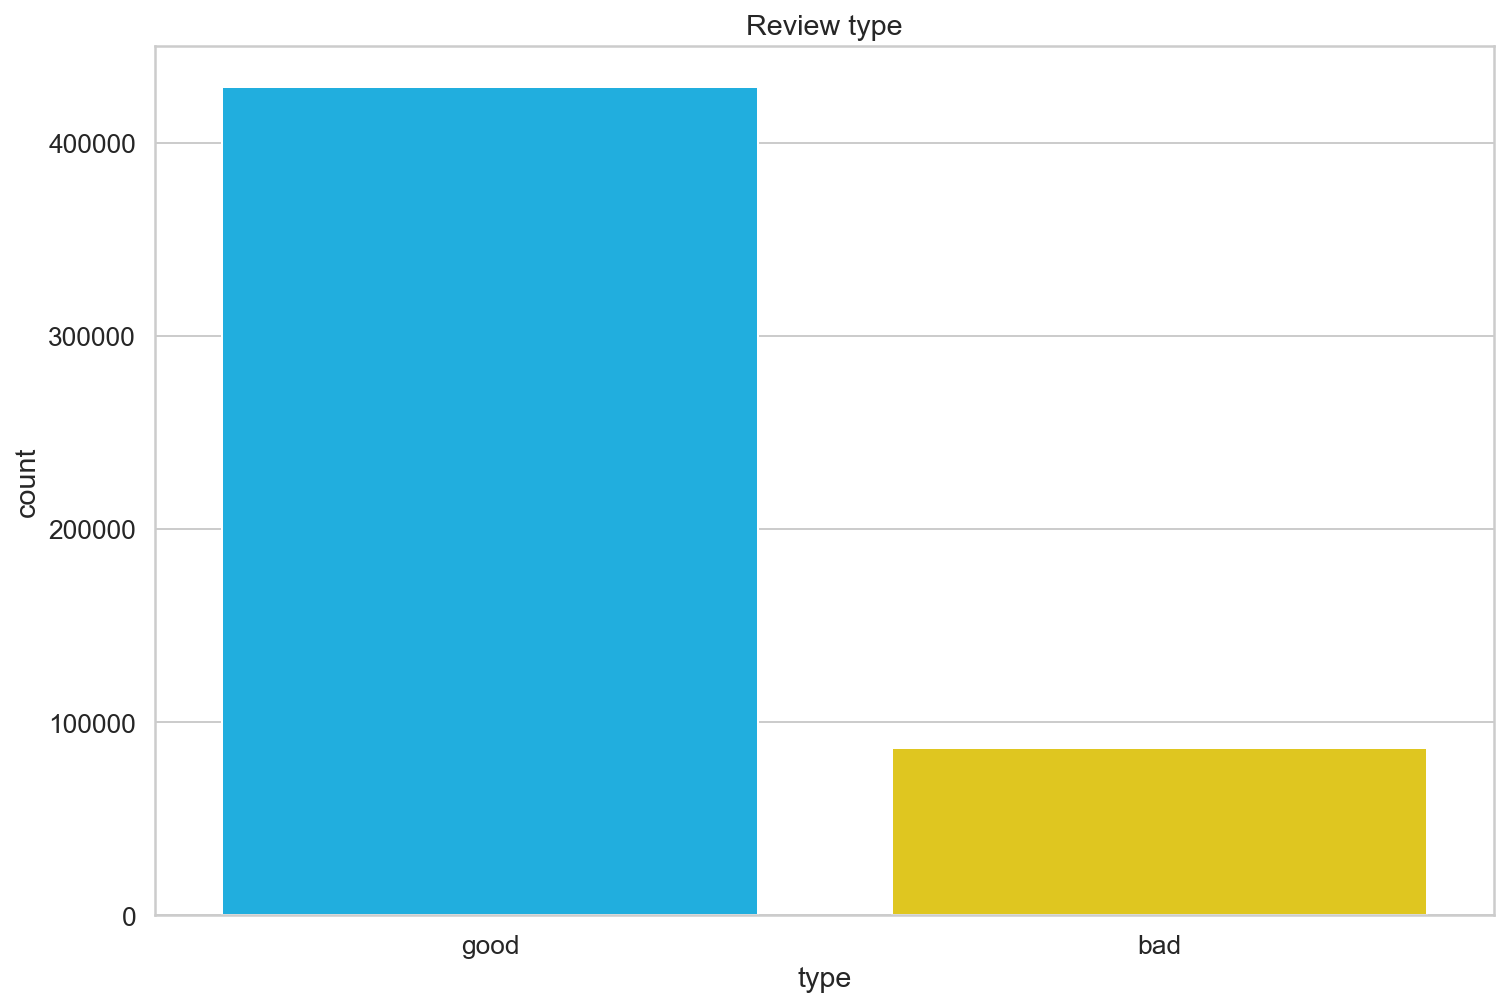

In [23]:
sns.countplot(
  x='review_type',
  data=df,
  order=df.review_type.value_counts().index
)
plt.xlabel("type")
plt.title("Review type");

In [24]:
good_reviews = df[df.review_type == "good"]
bad_reviews = df[df.review_type == "bad"]

In [25]:
print(good_reviews.shape, bad_reviews.shape)

(428887, 2) (86851, 2)


In [26]:
good_reviews_text = " ".join(good_reviews.review.to_numpy().tolist())
bad_reviews_text = " ".join(bad_reviews.review.to_numpy().tolist())

good_reviews_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(good_reviews_text)
bad_reviews_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(bad_reviews_text)

In [27]:
def show_word_cloud(cloud, title):
  plt.figure(figsize = (16, 10))
  plt.imshow(cloud, interpolation='bilinear')
  plt.title(title)
  plt.axis("off")
  plt.show();

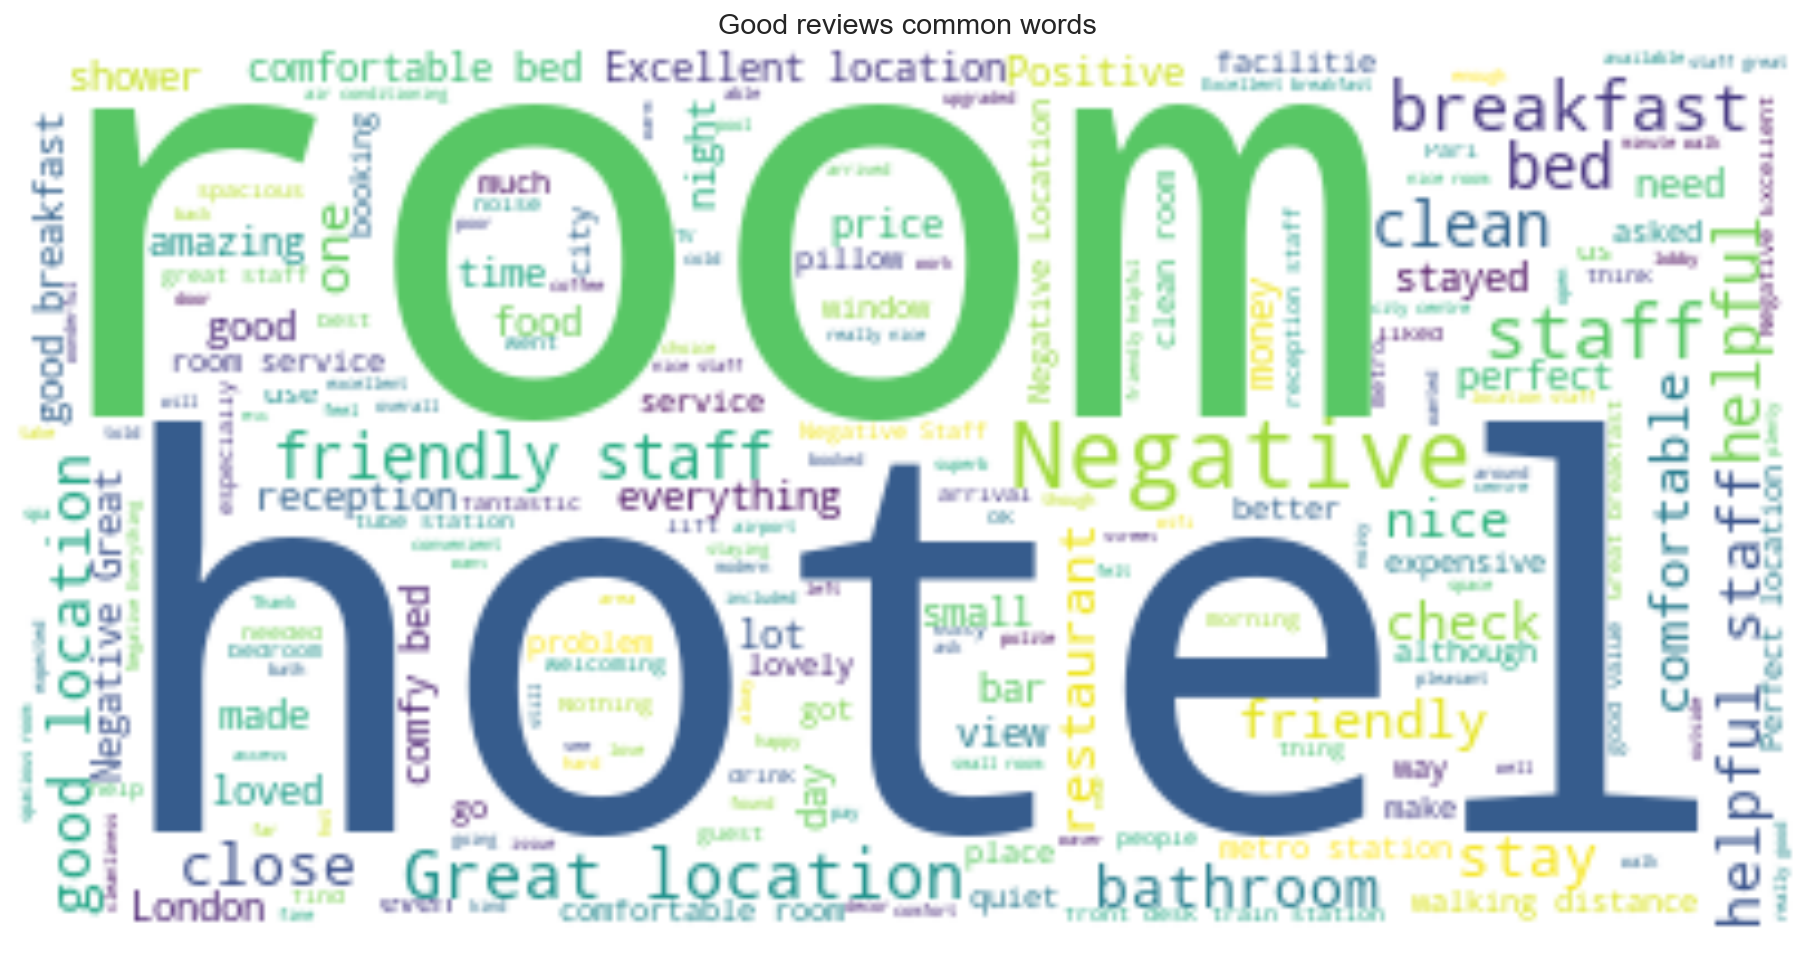

In [28]:
show_word_cloud(good_reviews_cloud, "Good reviews common words")

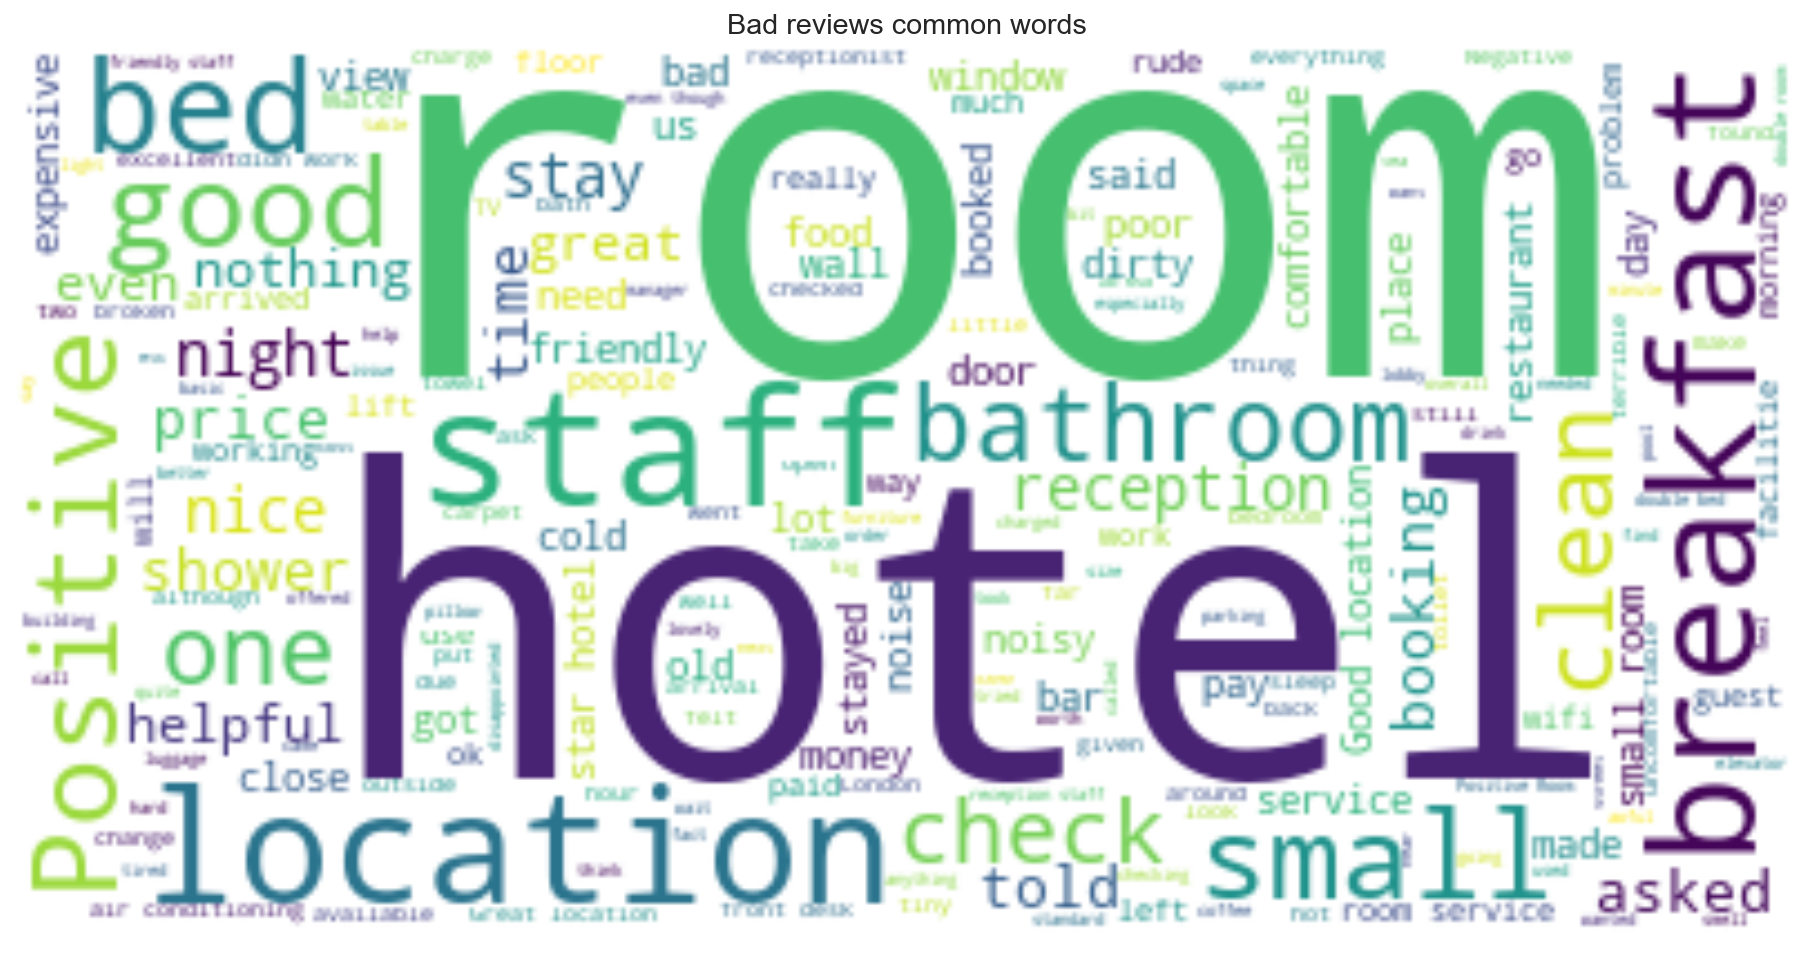

In [29]:
show_word_cloud(bad_reviews_cloud, "Bad reviews common words")

In [30]:
good_df = good_reviews.sample(n=len(bad_reviews), random_state=RANDOM_SEED)
bad_df = bad_reviews

In [31]:
review_df = good_df.append(bad_df).reset_index(drop=True)
review_df.shape

(173702, 2)

In [32]:
review_df.head()

,review,review_type
0,Nothing not to like Location was excellent r...,good
1,Replenishment of supplies in room toiletries ...,good
2,No Negative The views,good
3,Could do with biscuits and a complimentary wa...,good
4,Bar prices expensive and mini bar very expens...,good
